# clustering

### 00 | setting up

In [8]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl 

In [6]:
path = r'/Users/johntam/cf_data_analysis/tasks/A6/code'

cl_data = pd.read_csv(os.path.join(path, 'machine_data.csv'))

### 01 | elbow technique 

In [7]:
# using the elbow technique in order to determine the number of clusters

num_cl = range(1, 10) 
kmeans = [KMeans(n_clusters=i) for i in num_cl]

score = [kmeans[i].fit(cl_data).score(cl_data) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

/Users/johntam/opt/anaconda3/envs/da_python/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/johntam/opt/anaconda3/envs/da_python/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/johntam/opt/anaconda3/envs/da_python/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/johntam/opt/anaconda3/envs/da_python/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

[-9242553679255.71,
 -2311084164972.6445,
 -1027464062228.4441,
 -578209263916.8077,
 -370292024291.79047,
 -257334414238.29337,
 -189222314819.8861,
 -145023981651.48572,
 -114660349337.88168]

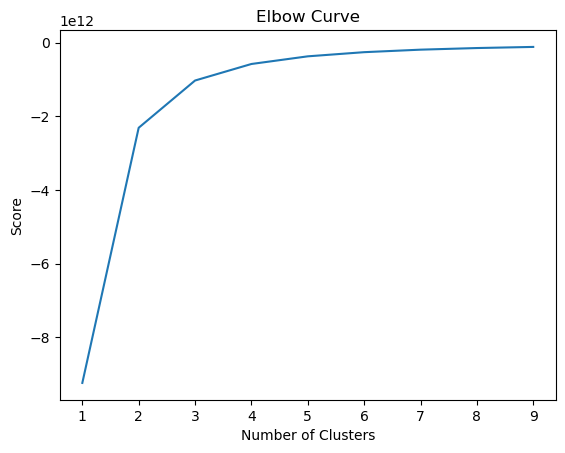

In [9]:
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

# it looks like the optimal number of clusters is 3

### 02 | k-means clustering

In [11]:
# applying a k-means clustering model to data

kmeans = KMeans(n_clusters = 3) 

kmeans.fit(cl_data)

/Users/johntam/opt/anaconda3/envs/da_python/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [12]:
cl_data['clusters'] = kmeans.fit_predict(cl_data)

/Users/johntam/opt/anaconda3/envs/da_python/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [13]:
cl_data.head()

,Unnamed: 0,realsum,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,...,city_berlin,city_budapest,city_lisbon,city_london,city_paris,city_rome,city_vienna,room_type_private_room,room_type_shared_room,clusters
0,0,194.033698,0.0,0,1,0,1.000,0.9125,0.1,0.197557,...,0,0,0,0,0,0,0,1,0,0
1,1,344.245776,0.5,0,0,0,0.750,0.8125,0.1,0.017970,...,0,0,0,0,0,0,0,1,0,0
2,2,264.101422,0.0,0,0,1,0.875,0.8375,0.1,0.226284,...,0,0,0,0,0,0,0,1,0,0
3,3,433.529398,0.5,0,0,1,0.875,0.8750,0.2,0.013869,...,0,0,0,0,0,0,0,1,0,0
4,4,485.552926,0.0,1,0,0,1.000,0.9750,0.1,0.020201,...,0,0,0,0,0,0,0,1,0,0


In [15]:
cl_data.clusters.value_counts()

0    16043
2    16012
1    15990
Name: clusters, dtype: int64

In [ ]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=cl_data['D. metro'], y=cl_data['Price per unit'], hue=kmeans.labels_, s=100) 

### 03 | exploring the clusters

In [ ]:
cl_data = cl_data.drop(['Unnamed: 0','lat','lng'], axis = 1)


In [31]:
features = (
 'person_capacity',
 'host_is_superhost',
 'multi',
 'biz',
 'cleanliness_rating',
 'guest_satisfaction_overall',
 'bedrooms',
 'dist',
 'metro_dist',
 'attr_index',
 'rest_index',
 'weekends',
 'city_athens',
 'city_barcelona',
 'city_berlin',
 'city_budapest',
 'city_lisbon',
 'city_london',
 'city_paris',
 'city_rome',
 'city_vienna',
 'room_type_private_room',
 'room_type_shared_room')

IndexError: index 6 is out of bounds for axis 0 with size 6

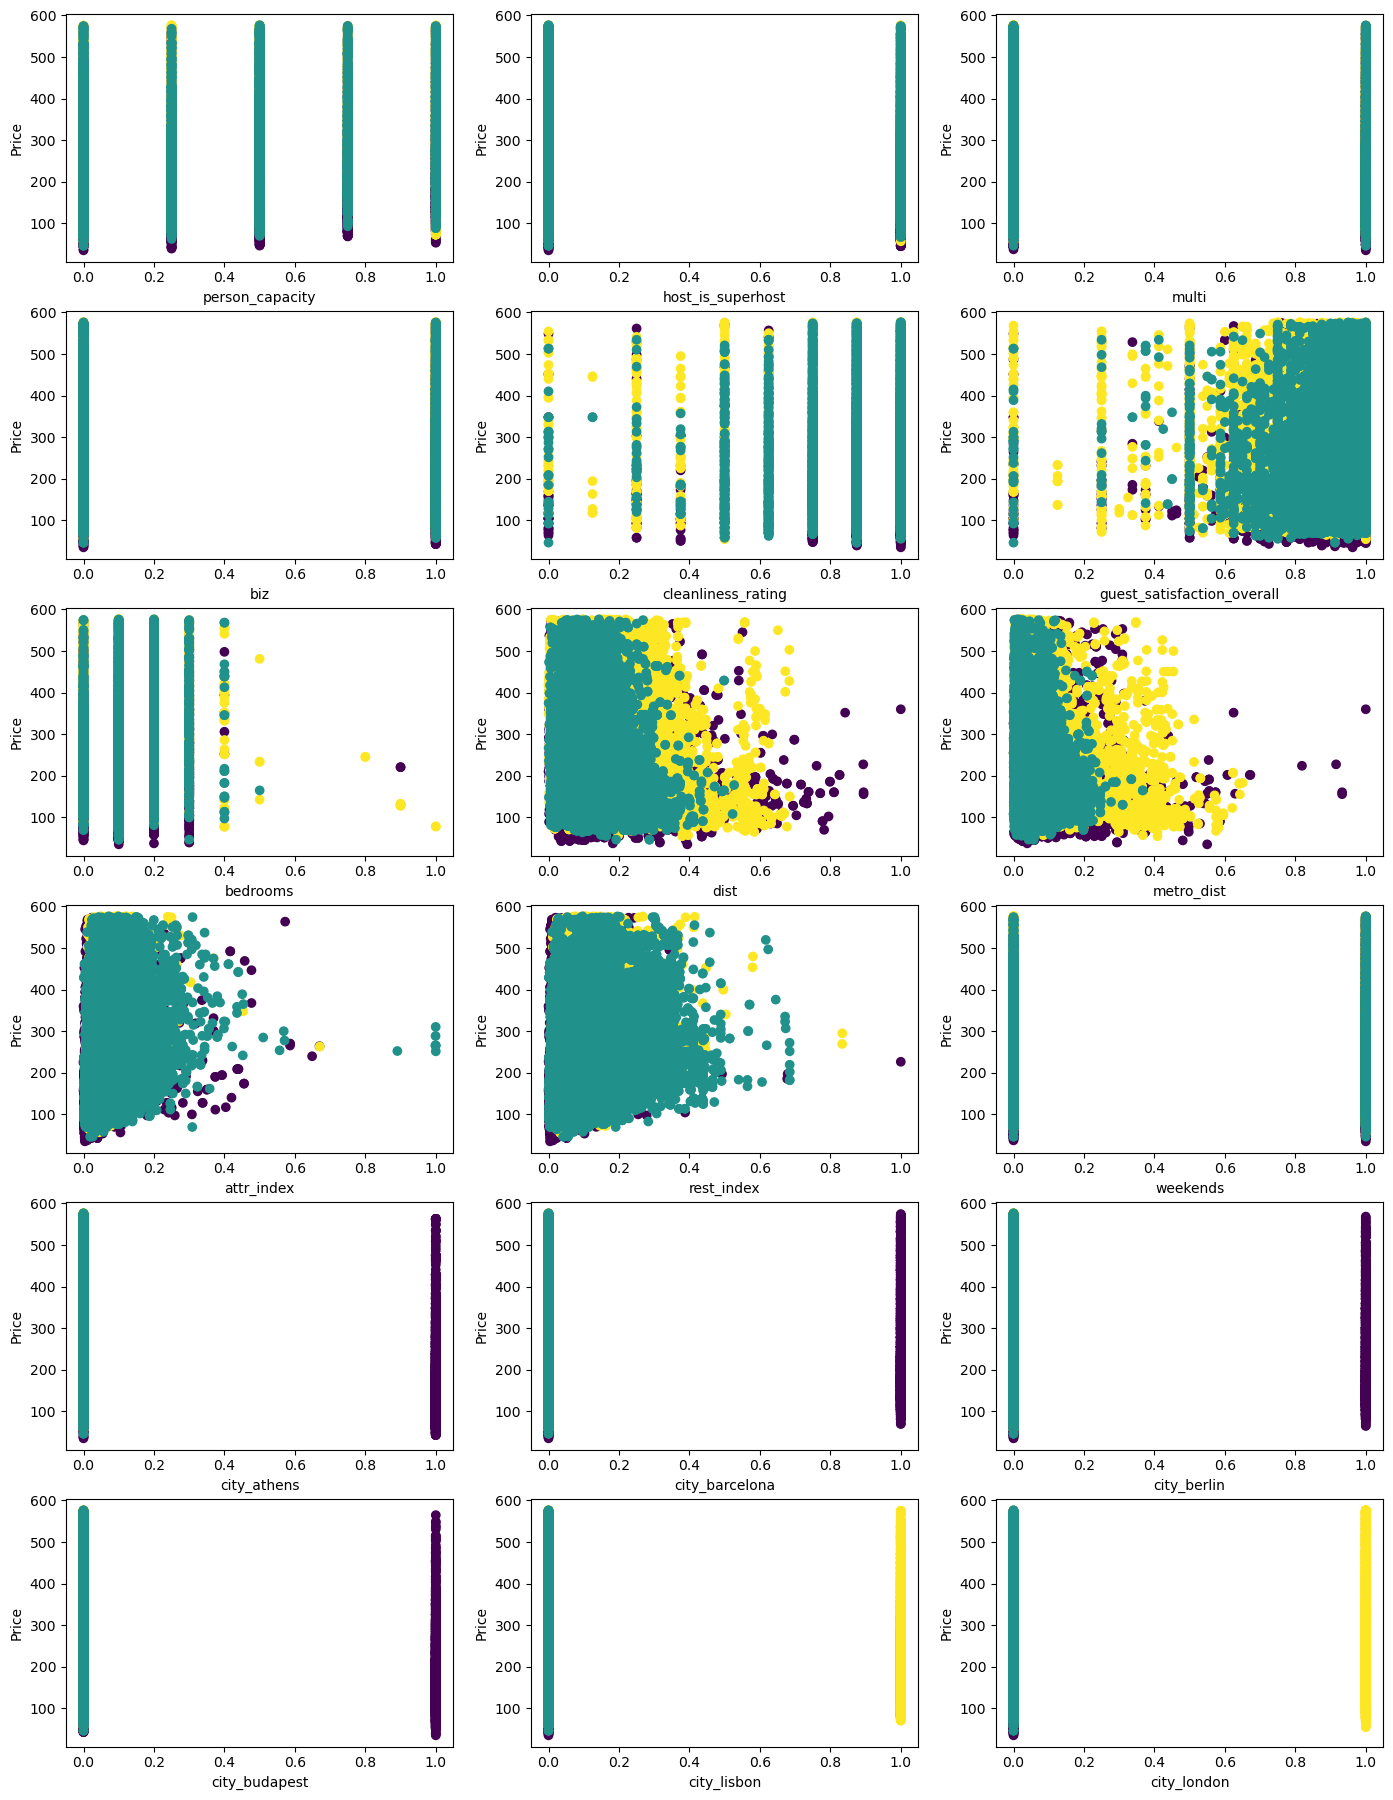

In [40]:
# creating function to show scatterplots by category

def plot(feature,x,y):
        
    axes[x,y].scatter(y=cl_data["realsum"], x=cl_data[feature],c=kmeans.labels_)
    axes[x,y].set_ylabel("Price")
    axes[x,y].set_xlabel(feature)

fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(17, 22.5))
x = 0
y = 0

for feature in features:
    plot(feature,x,y)
    y  = y + 1
    if y == 3:
        x = x + 1
        y = 0

plt.subplots_adjust(hspace=2.5)

IndexError: index 6 is out of bounds for axis 0 with size 6

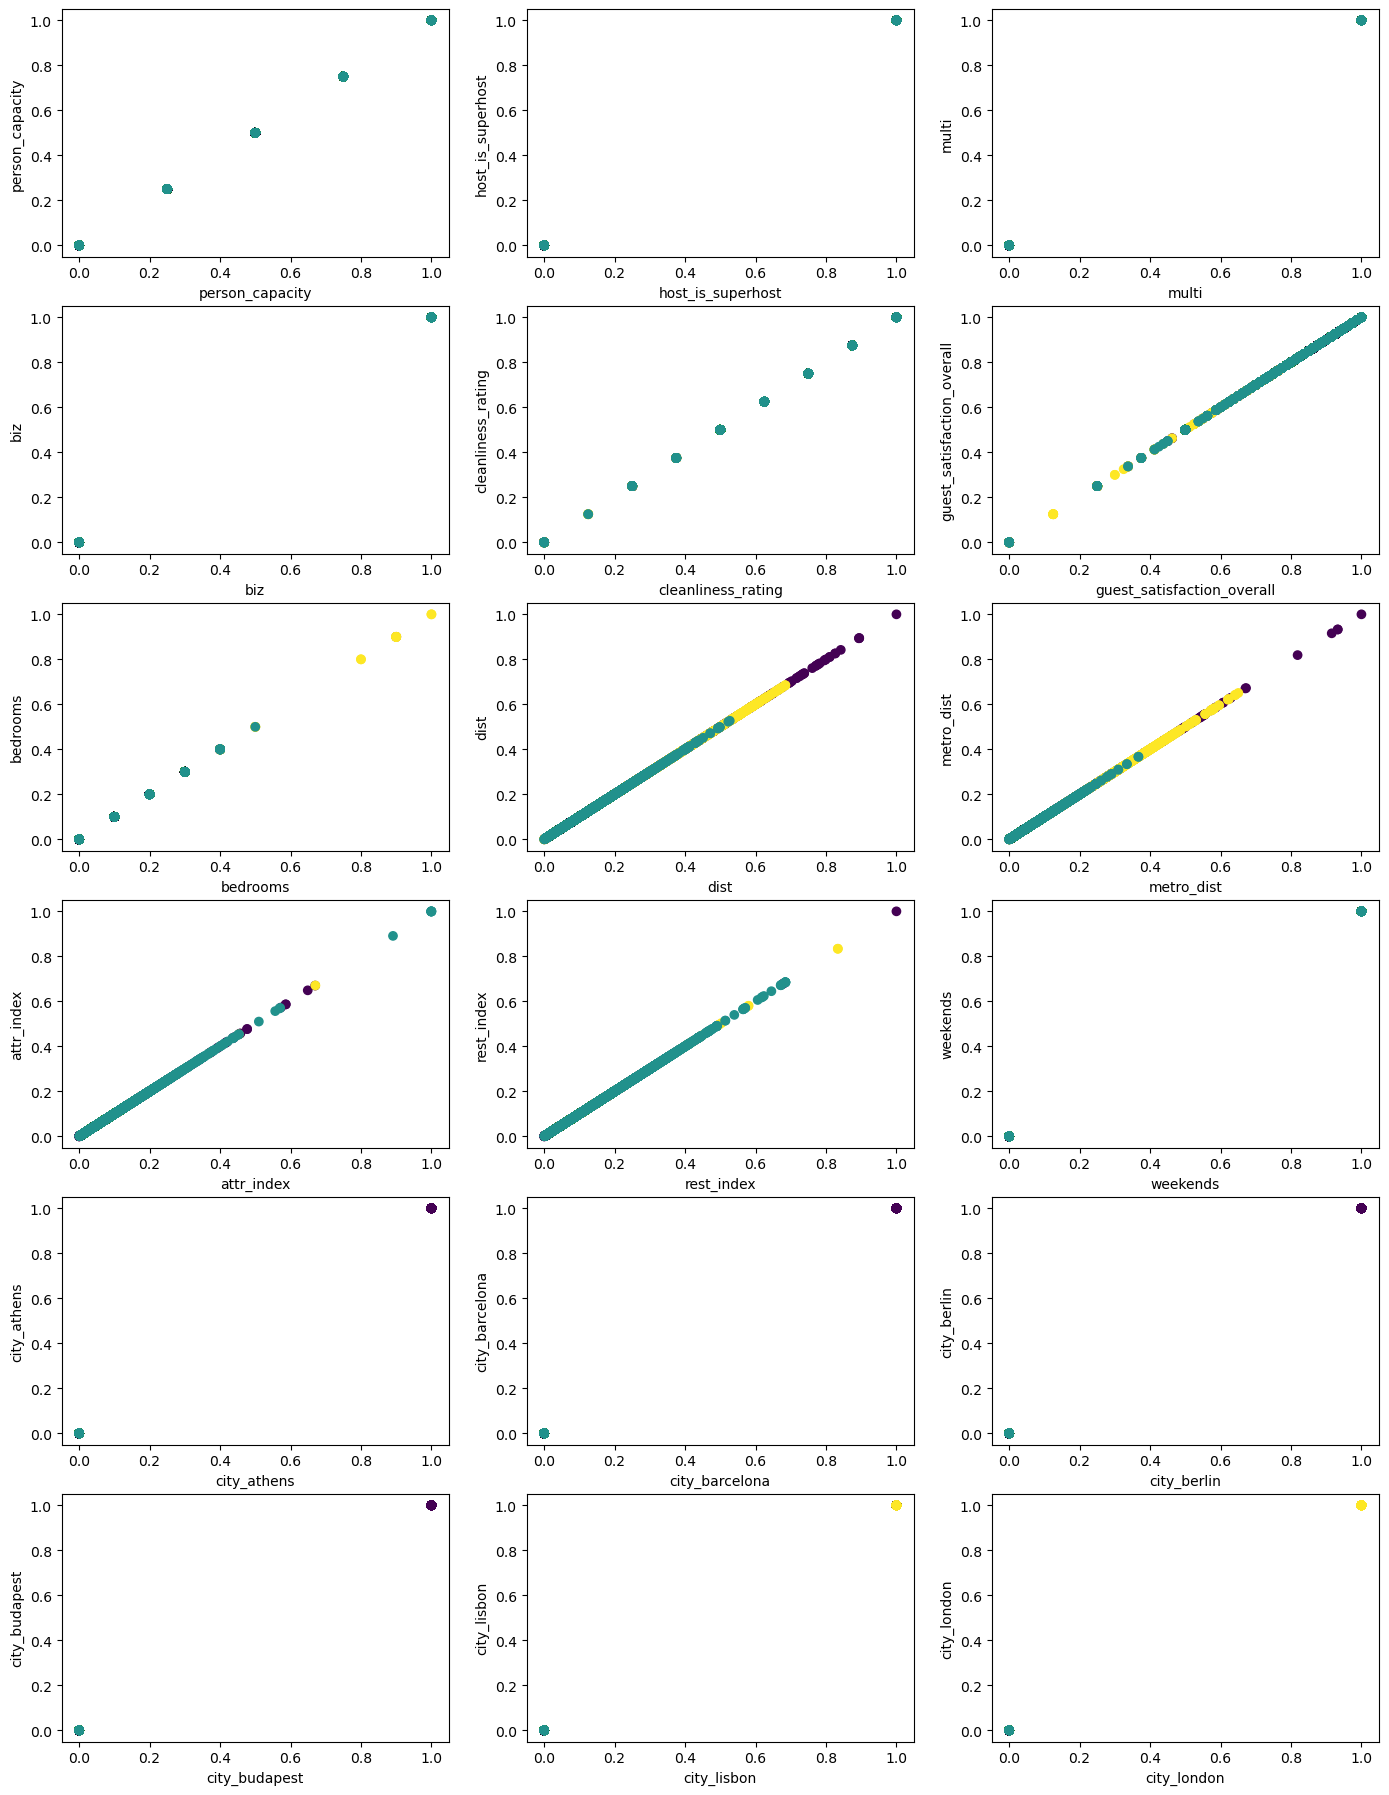

In [41]:
# creating function to show scatterplots by category

def plot(feature,x,y):
        
    axes[x,y].scatter(y=cl_data[feature], x=cl_data[feature],c=kmeans.labels_)
    axes[x,y].set_ylabel(feature)
    axes[x,y].set_xlabel(feature)

fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(17, 22.5))
x = 0
y = 0

for feature in features:
    plot(feature,x,y)
    y  = y + 1
    if y == 3:
        x = x + 1
        y = 0

plt.subplots_adjust(hspace=2.5)

In [47]:
# creating summary statistics for each group
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

cl_data.groupby('clusters').agg({'person_capacity':['mean', 'median'], 
                         'host_is_superhost':['mean', 'median'], 
                         'multi':['mean', 'median'],
                         'cleanliness_rating':['mean', 'median'],
                         'guest_satisfaction_overall':['mean', 'median'],
                          'bedrooms':['mean', 'median'],
                          'dist':['mean', 'median'],
                          'metro_dist':['mean', 'median'],
                          'attr_index':['mean', 'median'],
                          'rest_index':['mean', 'median'],
                          'weekends':['mean', 'median'],
                          'room_type_private_room':['mean', 'median'],
                          'room_type_shared_room':['mean', 'median']})




person_capacity        host_is_superhost            multi         \
                    mean median              mean median      mean median   
clusters                                                                    
0               0.294521   0.25          0.334538    0.0  0.306489    0.0   
1               0.302158   0.25          0.275610    0.0  0.324328    0.0   
2               0.213699   0.00          0.173745    0.0  0.260742    0.0   

         cleanliness_rating        guest_satisfaction_overall          \
                       mean median                       mean  median   
clusters                                                                
0                  0.937332    1.0                   0.925156  0.9500   
1                  0.930574    1.0                   0.912531  0.9375   
2                  0.904150    1.0                   0.885686  0.9125   

          bedrooms             dist           metro_dist           attr_index  \
              mean median      mean    median       mean    median       mean   
clusters                                                                        
0         0.113919    0.1  0.099367  0.072056   0.043880  0.028992   0.045525   
1         0.111920    0.1  0.121431  0.114275   0.043651  0.027617   0.077777   
2         0.108437    0.1  0.157794  0.140304   0.058040  0.031035   0.056380   

                   rest_index            weekends         \
            median       mean    median      mean median   
clusters                                                   
0         0.031911   0.053921  0.033371  0.464502    0.0   
1         0.061965   0.124279  0.104238  0.582552    1.0   
2         0.047889   0.088416  0.077225  0.470460    0.0   

         room_type_private_room        room_type_shared_room         
                           mean median                  mean median  
clusters                                                             
0                      0.345945    0.0              0.007542    0.0  
1                      0.317198    0.0              0.005191    0.0  
2                      0.482326    0.0              0.009993    0.0

###### from the scatter plots it seems like the clusters do not make much sense. From the summary statistics it looks like the clusters differ in distance (0: closest 1: medium closness 2: farthest), metro distance (0&1: closer to metro 2: far from metro), attr index ( 1: closer to attr than others), rest_index (1: closer to restaurants than the others), weekends (1: mostly booked on weekends), private room (2: mostly private rooms)